In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, 
                            summarize, 
                            poly)

In [2]:
rng = np.random.default_rng(1)
x = rng.normal(loc = 0, scale = 1, size = 100)
eps = rng.normal(loc = 0, scale = .25, size = 100)
y = -1 + 0.5 * x + eps
data = pd.DataFrame({
    "x": x, 
    "y": y
})

Text(0, 0.5, 'y')

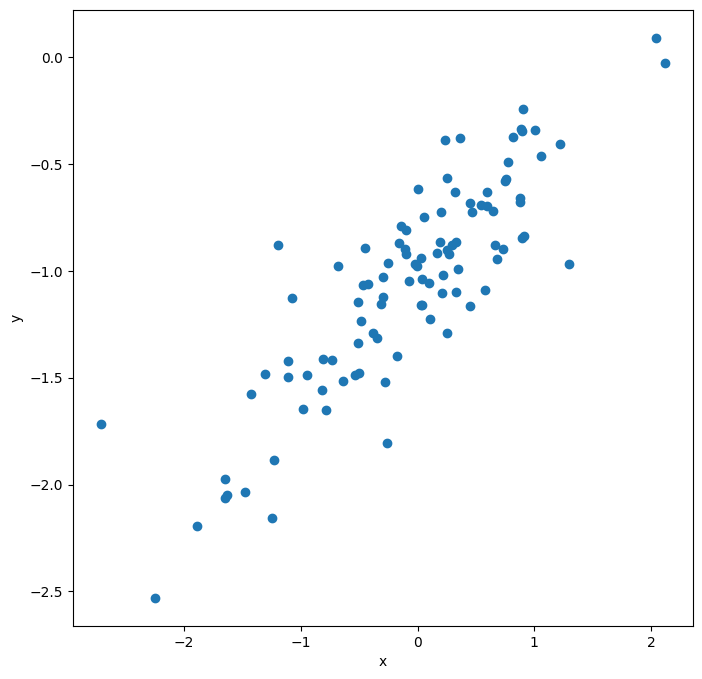

In [3]:
ax = subplots(figsize = (8, 8))[1]
ax.scatter(data.x, data.y)
ax.set_xlabel("x")
ax.set_ylabel("y")

In [4]:
X = MS(["x"]).fit_transform(data)
y = data.y
model = sm.OLS(y, X)
results = model.fit()
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,-1.0190,0.025,-40.537,0.0
x,0.4921,0.029,16.734,0.0


Text(0.5, 1.0, 'initial')

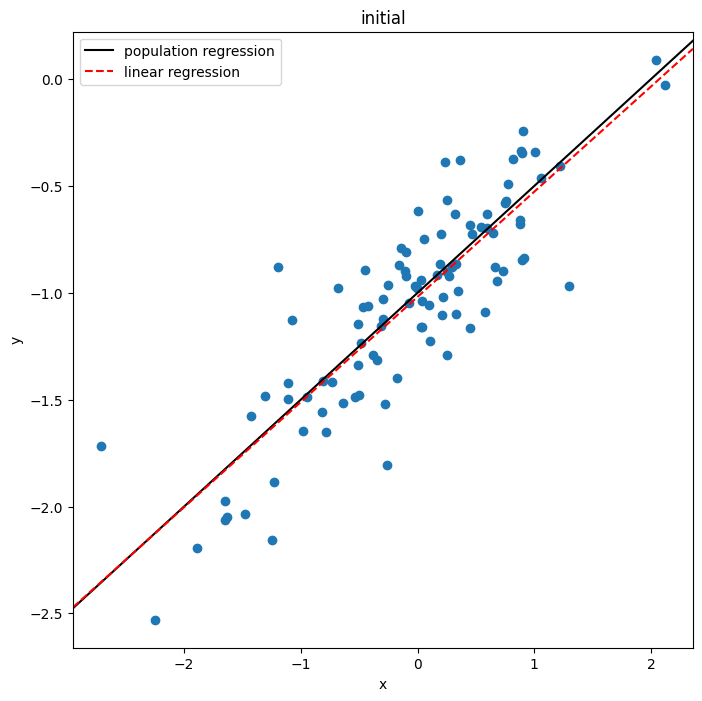

In [5]:
ax = subplots(figsize = (8, 8))[1]
ax.scatter(data.x, data.y)
ax.set_xlabel("x")
ax.set_ylabel("y")
# population regression line
ax.axline((0, -1), 
         slope = 0.5, 
         label = "population regression", 
         c = "k")
# model regression line
ax.axline((0, results.params["intercept"]), # go through (0, intercept)
          slope = results.params["x"], 
          label = "linear regression", 
          c = "red", 
          ls = "--")
ax.legend()
ax.set_title("initial")

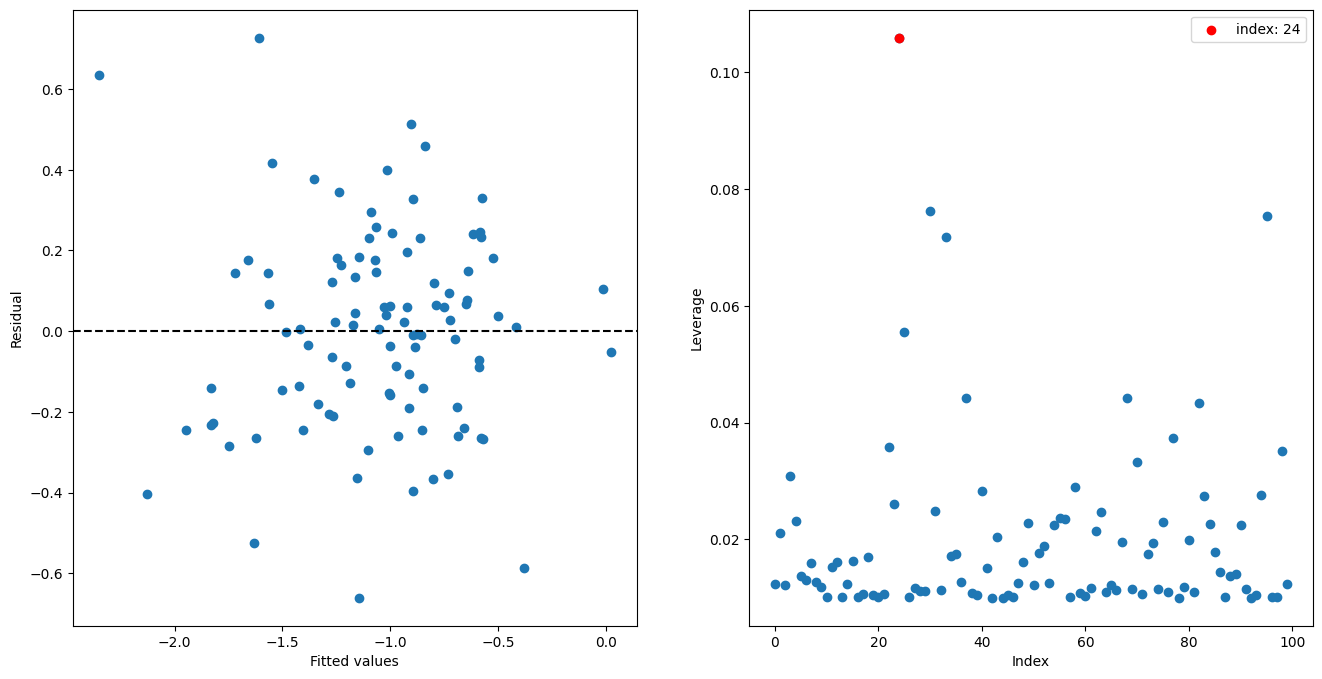

In [6]:
from utils import *
plot_diagnostics(results)

In [7]:
# more noise
eps2 = rng.normal(loc = 0, scale = 1, size = 100)
y2 = -1 + 0.5 * x + eps2
data2 = pd.DataFrame({
    "x": x, 
    "y": y2
})

In [8]:
X = MS(["x"]).fit_transform(data2)
y = data2.y
model2 = sm.OLS(data2.y, X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,-1.1619,0.093,-12.551,0.0
x,0.4872,0.108,4.498,0.0


Text(0.5, 1.0, 'more noise')

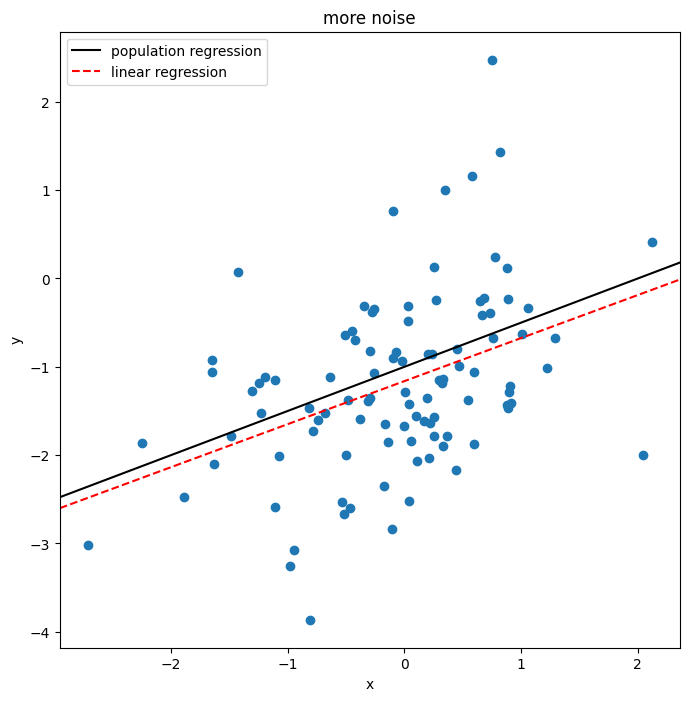

In [9]:
ax = subplots(figsize = (8, 8))[1]
ax.scatter(data2.x, data2.y)
ax.set_xlabel("x")
ax.set_ylabel("y")
# population regression line
ax.axline((0, -1), 
         slope = 0.5, 
         label = "population regression", 
         c = "k")
# model regression line
ax.axline((0, results2.params["intercept"]), # go through (0, intercept)
          slope = results2.params["x"], 
          label = "linear regression", 
          c = "red", 
          ls = "--")
ax.legend()
ax.set_title("more noise")

In [10]:
# less noise
eps3 = rng.normal(loc = 0, scale = .1, size = 100)
y3 = -1 + 0.5 * x + eps3
data3 = pd.DataFrame({
    "x": x, 
    "y": y3
})

In [11]:
X = MS(["x"]).fit_transform(data3)
y = data3.y
model3 = sm.OLS(data3.y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,-1.0009,0.009,-114.449,0.0
x,0.5147,0.010,50.304,0.0


Text(0.5, 1.0, 'less noise')

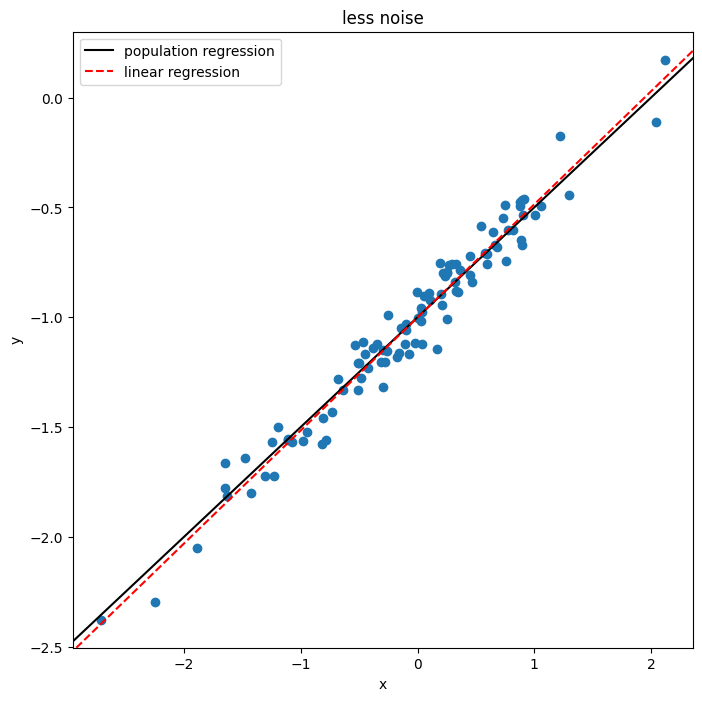

In [12]:
ax = subplots(figsize = (8, 8))[1]
ax.scatter(data3.x, data3.y)
ax.set_xlabel("x")
ax.set_ylabel("y")
# population regression line
ax.axline((0, -1), 
         slope = 0.5, 
         label = "population regression", 
         c = "k")
# model regression line
ax.axline((0, results3.params["intercept"]), # go through (0, intercept)
          slope = results3.params["x"], 
          label = "linear regression", 
          c = "red", 
          ls = "--")
ax.legend()
ax.set_title("less noise")

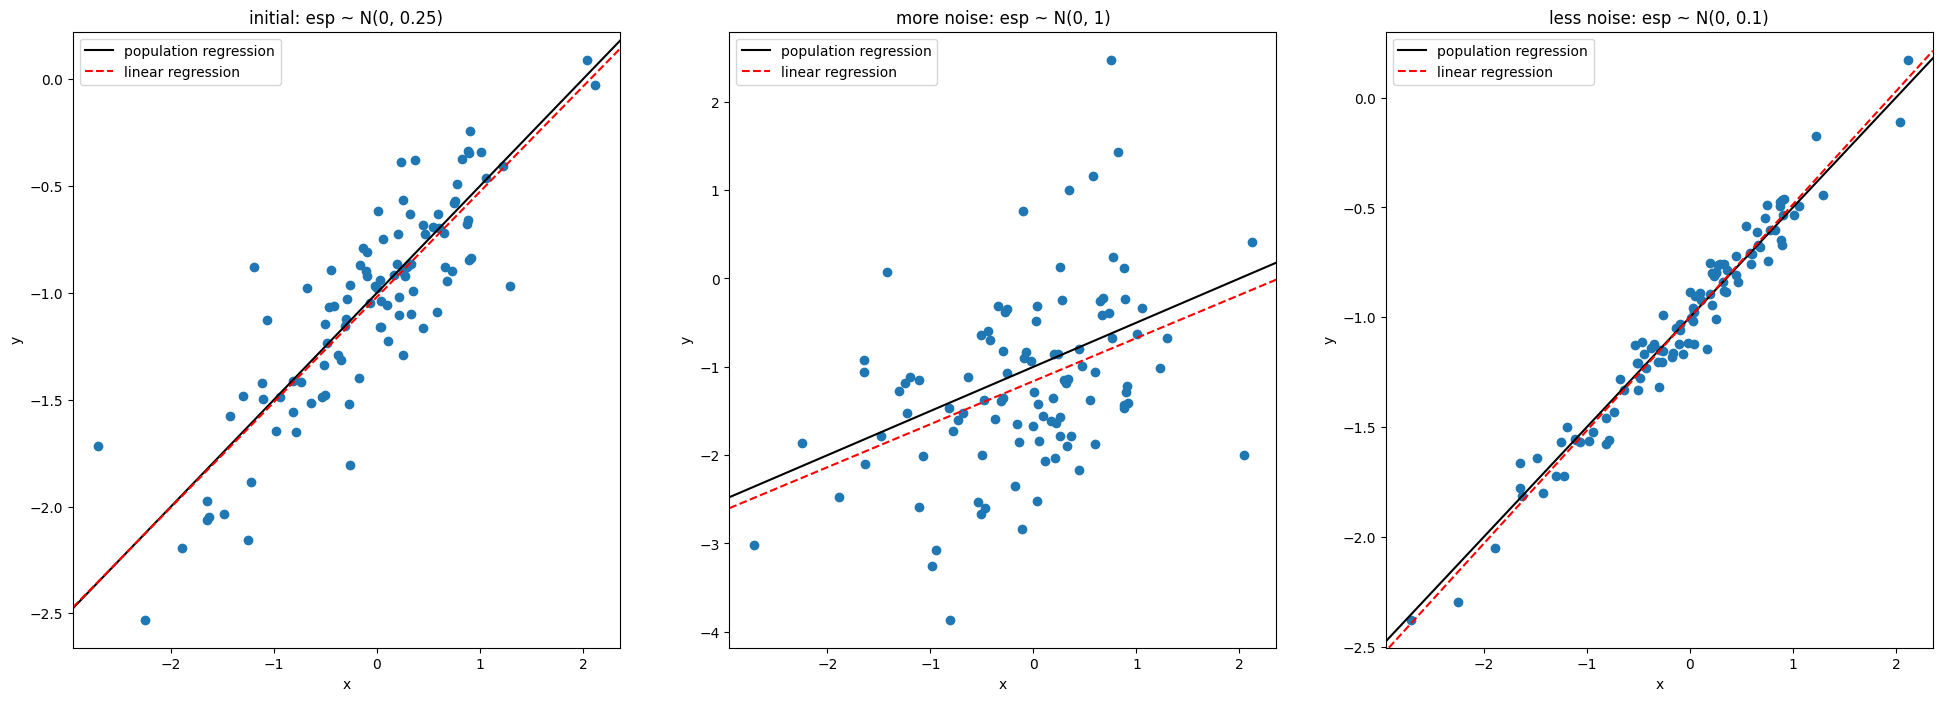

In [13]:
fig, axes = subplots(1, 3, figsize = (24, 8))
models = [model, model2, model3]
datas = [data, data2, data3]
results_list = [results, results2, results3]
for i in range(3): 
    m = models[i]
    d = datas[i]
    r = results_list[i]
    ax = axes[i]
    
    ax.scatter(d.x, d.y)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    # population regression line
    ax.axline((0, -1), 
             slope = 0.5, 
             label = "population regression", 
             c = "k")
    # model regression line
    ax.axline((0, r.params["intercept"]), # go through (0, intercept)
              slope = r.params["x"], 
              label = "linear regression", 
              c = "red", 
              ls = "--")
    ax.legend()
    if i == 0: 
        ax.set_title("initial: esp ~ N(0, 0.25)")
    elif i == 1: 
        ax.set_title("more noise: esp ~ N(0, 1)")
    elif i == 2: 
        ax.set_title("less noise: esp ~ N(0, 0.1)")